# Zindi Logistic Challenge

The following is a submission attempt for the Zindi logistic challenge


## Import Library

In [1]:
# Importing the required packages here
import numpy as np
import pandas as pd
import seaborn as sns
import ast, json
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

sns.set()

In [2]:
train_data = pd.read_csv('data/Train.csv')

In [3]:
train_data.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


In [4]:
train_data.shape

(21201, 29)

In [5]:
train_data.describe()

,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival
count,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,16835.000000,552.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000
mean,2.752182,15.653696,3.240083,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,9.506533,23.258889,7.905797,-1.281470,36.811264,-1.282581,36.811220,1556.920947
std,0.625178,8.798916,1.567295,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,5.668963,3.615768,17.089971,0.030507,0.037473,0.034824,0.044721,987.270788
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.200000,0.100000,-1.438302,36.653621,-1.430298,36.606594,1.000000
25%,3.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,5.000000,20.600000,1.075000,-1.300921,36.784605,-1.301201,36.785661,882.000000
50%,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,8.000000,23.500000,2.900000,-1.279395,36.807040,-1.284382,36.808002,1369.000000
75%,3.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,13.000000,26.000000,4.900000,-1.257147,36.829741,-1.261177,36.829477,2040.000000
max,4.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,49.000000,32.100000,99.100000,-1.147170,36.991046,-1.030225,37.016779,7883.000000


In [6]:
train_data.columns

Index(['Order No', 'User Id', 'Vehicle Type', 'Platform Type',
       'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Confirmation - Time', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)',
       'Arrival at Destination - Time', 'Distance (KM)', 'Temperature',
       'Precipitation in millimeters', 'Pickup Lat', 'Pickup Long',
       'Destination Lat', 'Destination Long', 'Rider Id',
       'Time from Pickup to Arrival'],
      dtype='object')

In [7]:
train_data.dtypes

Order No                                      object
User Id                                       object
Vehicle Type                                  object
Platform Type                                  int64
Personal or Business                          object
Placement - Day of Month                       int64
Placement - Weekday (Mo = 1)                   int64
Placement - Time                              object
Confirmation - Day of Month                    int64
Confirmation - Weekday (Mo = 1)                int64
Confirmation - Time                           object
Arrival at Pickup - Day of Month               int64
Arrival at Pickup - Weekday (Mo = 1)           int64
Arrival at Pickup - Time                      object
Pickup - Day of Month                          int64
Pickup - Weekday (Mo = 1)                      int64
Pickup - Time                                 object
Arrival at Destination - Day of Month          int64
Arrival at Destination - Weekday (Mo = 1)     

## Missing Values 

In [8]:
train_data.isna().sum()

Order No                                         0
User Id                                          0
Vehicle Type                                     0
Platform Type                                    0
Personal or Business                             0
Placement - Day of Month                         0
Placement - Weekday (Mo = 1)                     0
Placement - Time                                 0
Confirmation - Day of Month                      0
Confirmation - Weekday (Mo = 1)                  0
Confirmation - Time                              0
Arrival at Pickup - Day of Month                 0
Arrival at Pickup - Weekday (Mo = 1)             0
Arrival at Pickup - Time                         0
Pickup - Day of Month                            0
Pickup - Weekday (Mo = 1)                        0
Pickup - Time                                    0
Arrival at Destination - Day of Month            0
Arrival at Destination - Weekday (Mo = 1)        0
Arrival at Destination - Time  

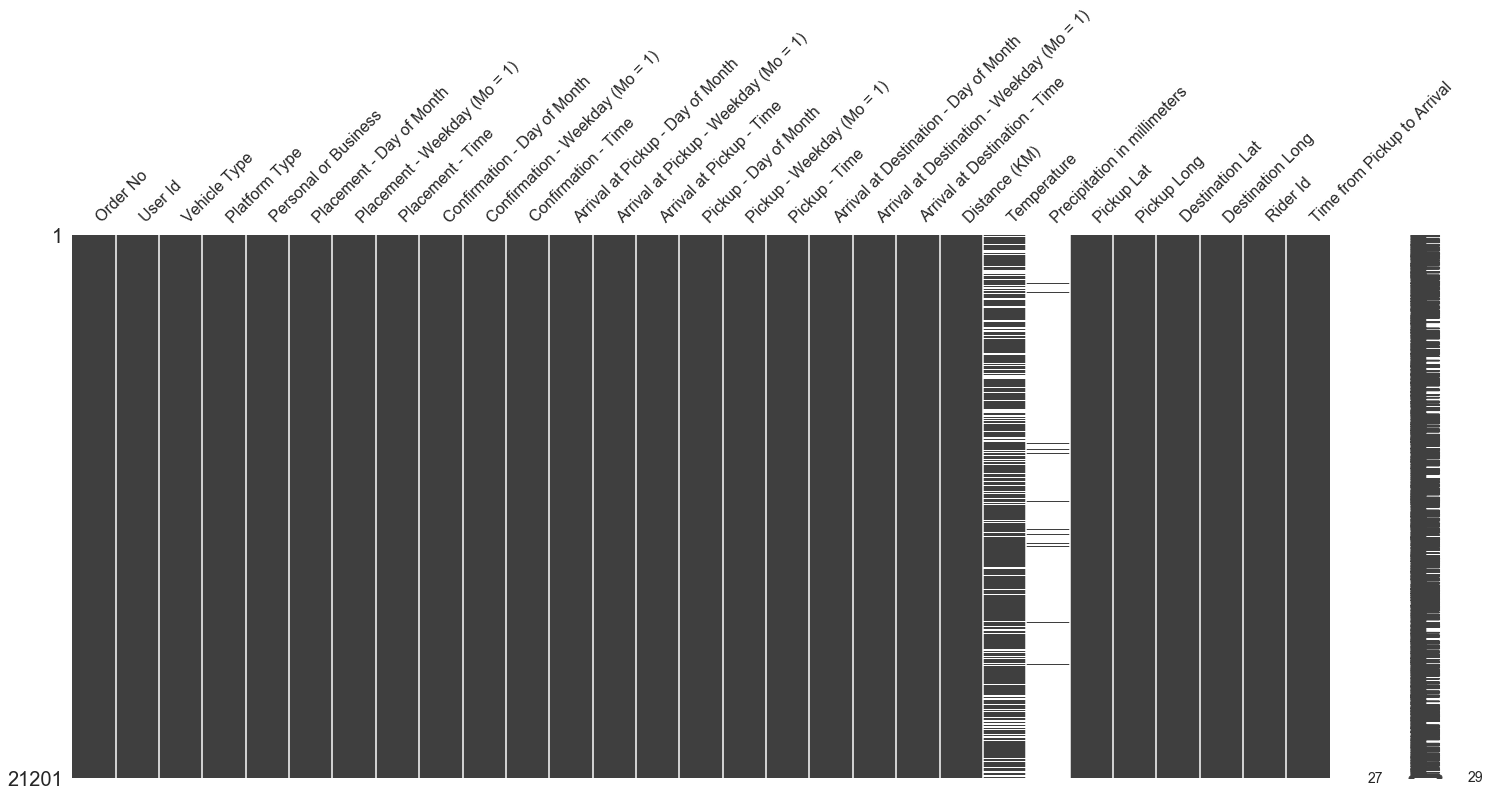

In [9]:
import missingno as msno

msno.matrix(train_data);

I will drop the following columns due to missing data + irellevance for now. Vehicle type is dropped due to the fact that all of the vehicles are bicycles

In [10]:
drop_col = ['Order No','User Id','Vehicle Type','Temperature','Precipitation in millimeters']
data = train_data.drop(drop_col,axis=1)

## Checking dupicates

In [11]:
print(data.shape)

(21201, 24)


In [12]:
duplicate_rows_df = data[data.duplicated()]
print(duplicate_rows_df.shape)
# ther is 141 duplicated tows

(0, 24)


## Exploring Datasets

Looking at the distribution of our results

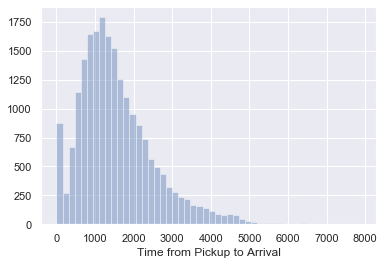

In [13]:
plot = sns.distplot(data['Time from Pickup to Arrival'],kde=False)

In [14]:
# I will make categories for the weekdays
data = data.astype({'Arrival at Pickup - Weekday (Mo = 1)': "category",
                    'Arrival at Destination - Weekday (Mo = 1)': "category",
                    'Placement - Weekday (Mo = 1)': 'category',
                    'Confirmation - Weekday (Mo = 1)': "category"
                   })
data.dtypes

Platform Type                                   int64
Personal or Business                           object
Placement - Day of Month                        int64
Placement - Weekday (Mo = 1)                 category
Placement - Time                               object
Confirmation - Day of Month                     int64
Confirmation - Weekday (Mo = 1)              category
Confirmation - Time                            object
Arrival at Pickup - Day of Month                int64
Arrival at Pickup - Weekday (Mo = 1)         category
Arrival at Pickup - Time                       object
Pickup - Day of Month                           int64
Pickup - Weekday (Mo = 1)                       int64
Pickup - Time                                  object
Arrival at Destination - Day of Month           int64
Arrival at Destination - Weekday (Mo = 1)    category
Arrival at Destination - Time                  object
Distance (KM)                                   int64
Pickup Lat                  

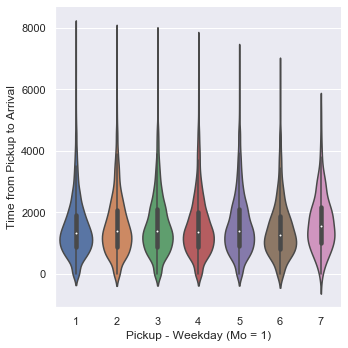

In [15]:
sns.catplot(x="Pickup - Weekday (Mo = 1)", y="Time from Pickup to Arrival", data=data, kind="violin",jitter=False, dodge=True)

In [16]:
data['Pickup - Time'].value_counts()

11:19:28 AM    6
12:04:20 PM    6
2:28:10 PM     6
10:53:20 AM    6
9:53:04 AM     5
              ..
12:26:19 PM    1
10:00:56 AM    1
12:07:26 PM    1
11:08:36 AM    1
11:13:58 AM    1
Name: Pickup - Time, Length: 15690, dtype: int64

In [17]:
data.describe(include='category')

,Placement - Weekday (Mo = 1),Confirmation - Weekday (Mo = 1),Arrival at Pickup - Weekday (Mo = 1),Arrival at Destination - Weekday (Mo = 1)
count,21201,21201,21201,21201
unique,7,7,7,7
top,4,4,4,4
freq,4228,4229,4229,4229


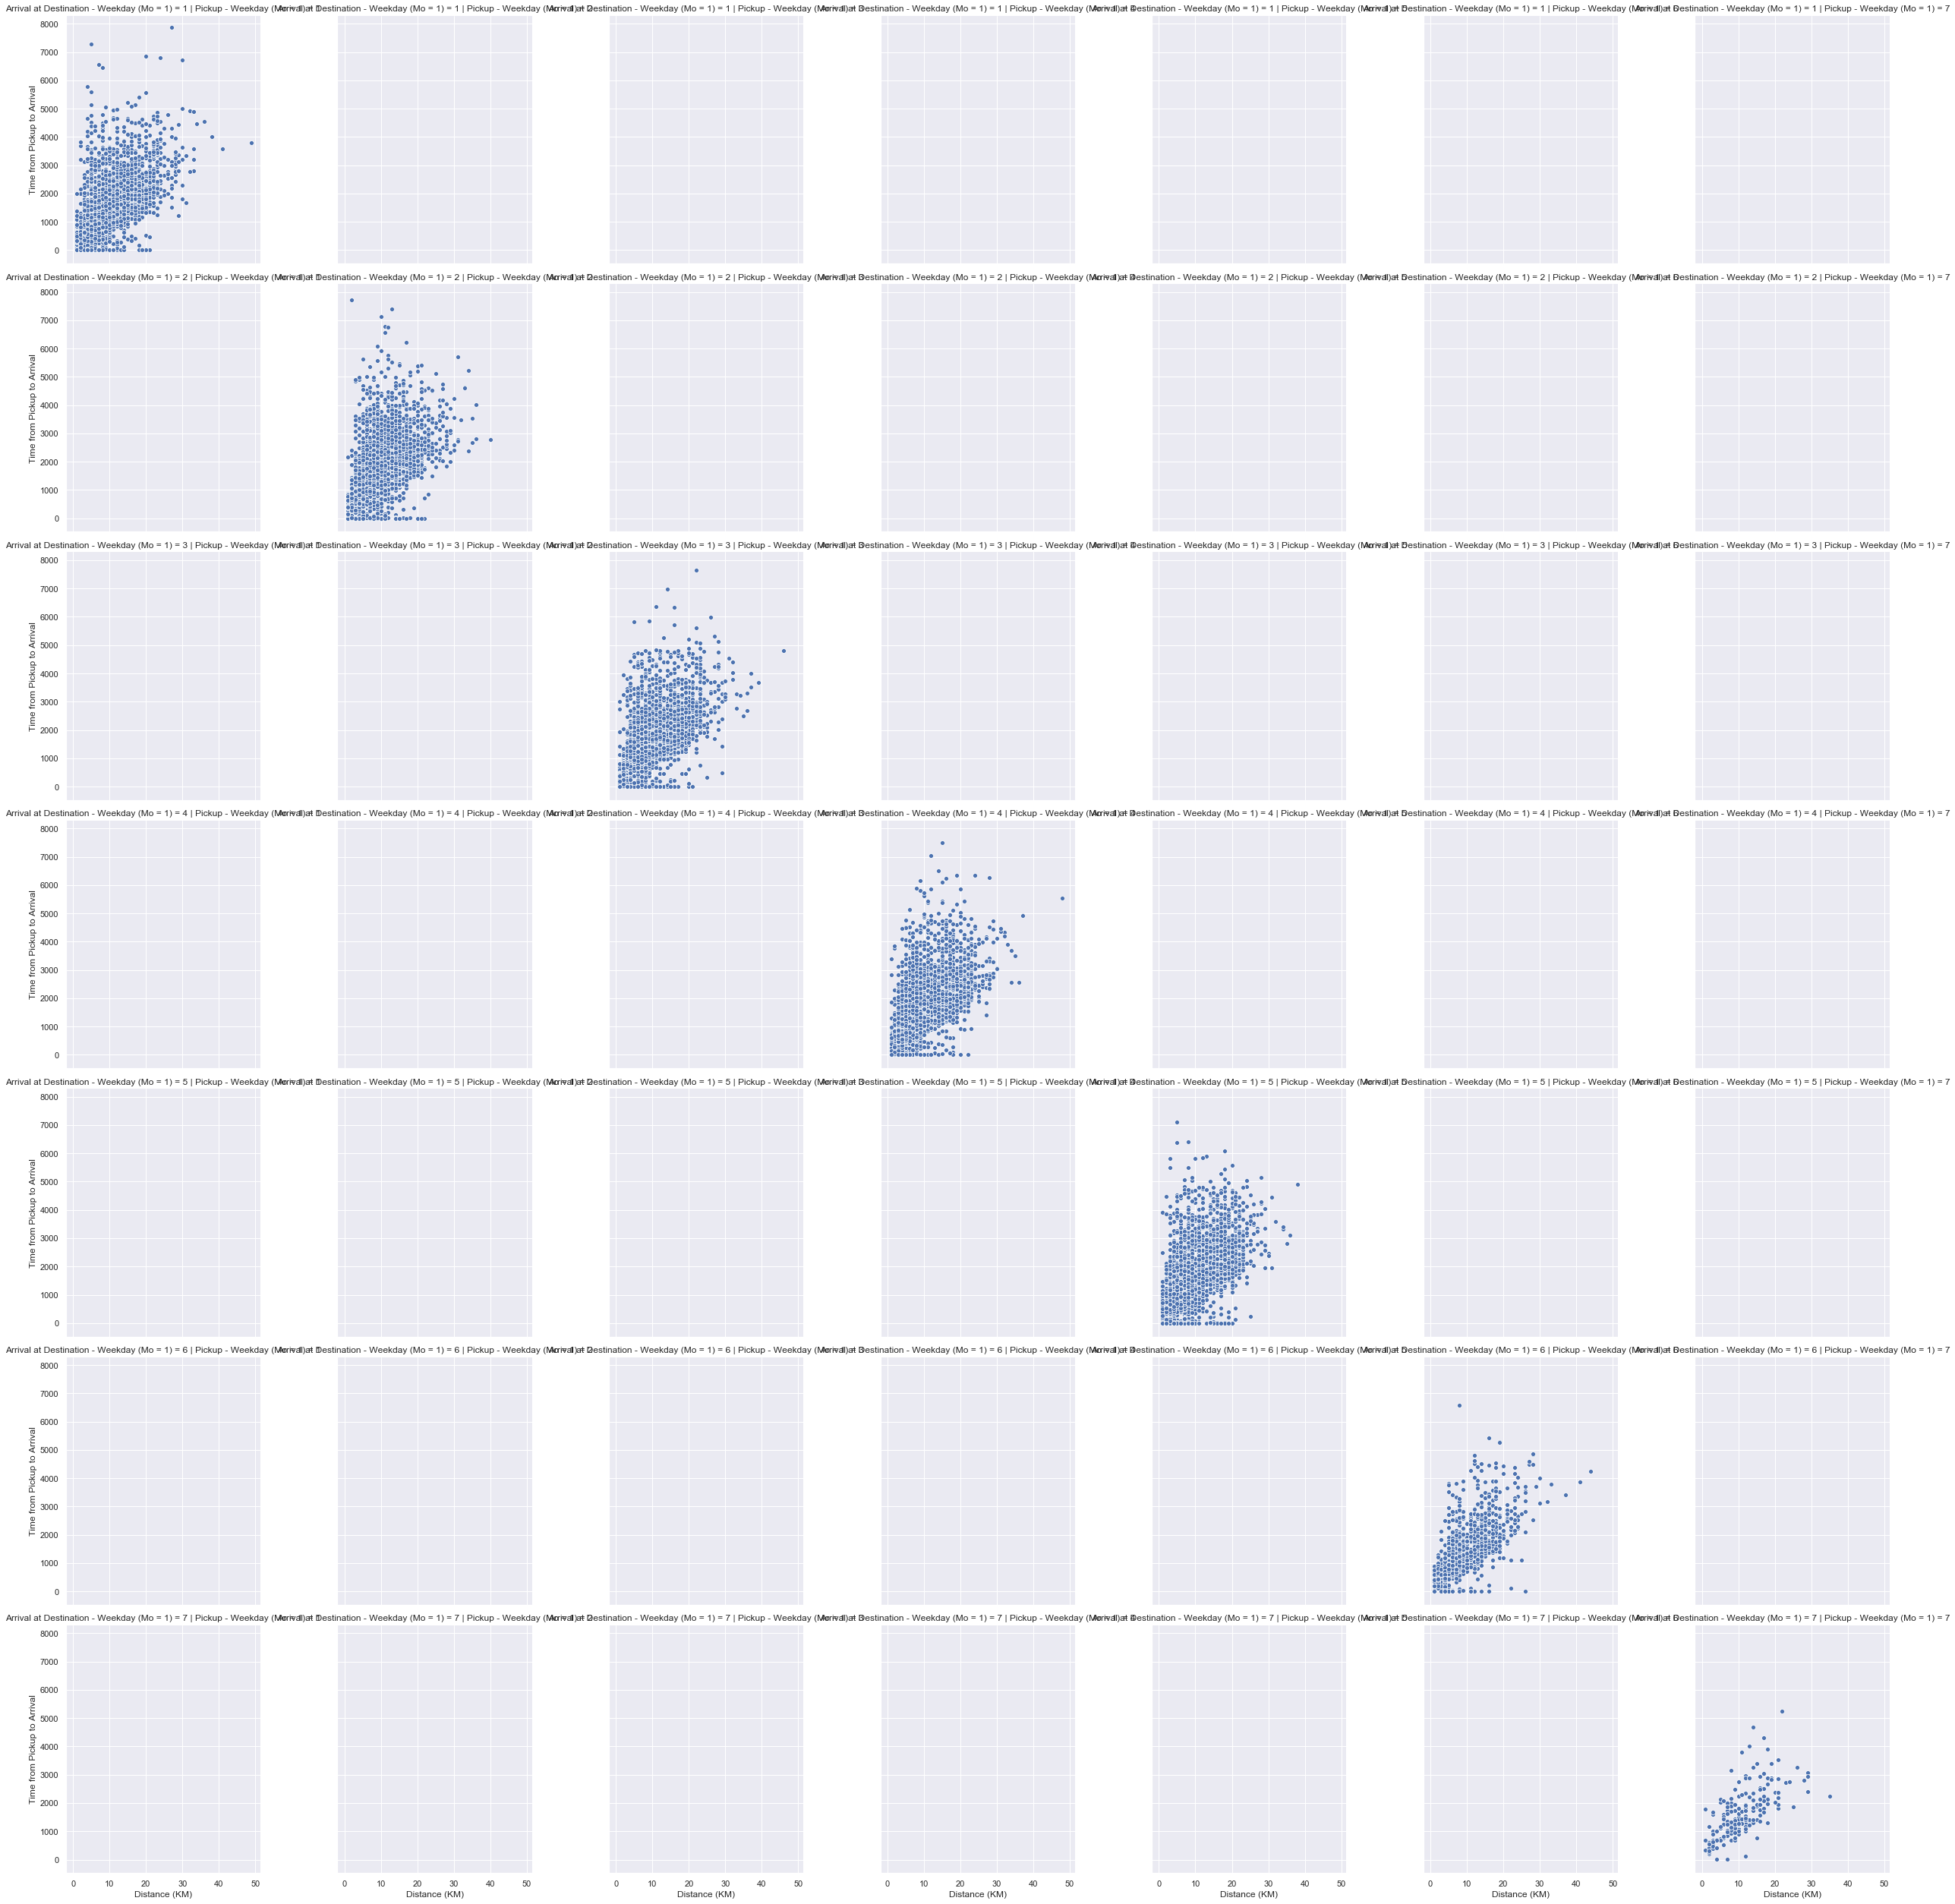

In [18]:
sns.relplot(x='Distance (KM)', y='Time from Pickup to Arrival',row='Arrival at Destination - Weekday (Mo = 1)', col='Pickup - Weekday (Mo = 1)',data=data)

All deliveries take places in the same day (There are no two days delivery). 

In [19]:
numerical_columns = ['Distance (KM)','Pickup Lat',
       'Pickup Long', 'Destination Lat', 'Destination Long', 'Time from Pickup to Arrival']
categorical_columns = ['Personal or Business', 'Arrival at Pickup - Weekday (Mo = 1)','Pickup - Day of Month',]

data[categorical_columns] = data[categorical_columns].astype('object')

## Feature Selection

In [20]:
from sklearn.preprocessing import normalize

normalize_data = normalize(data[numerical_columns])
normalized_data = pd.DataFrame(normalize_data,columns=numerical_columns)

In [21]:
# Categorical Columns

encoded_cat = pd.get_dummies(data[categorical_columns])
encoded_cat.head()

,Personal or Business_Business,Personal or Business_Personal,Arrival at Pickup - Weekday (Mo = 1)_1,Arrival at Pickup - Weekday (Mo = 1)_2,Arrival at Pickup - Weekday (Mo = 1)_3,Arrival at Pickup - Weekday (Mo = 1)_4,Arrival at Pickup - Weekday (Mo = 1)_5,Arrival at Pickup - Weekday (Mo = 1)_6,Arrival at Pickup - Weekday (Mo = 1)_7,Pickup - Day of Month_1,...,Pickup - Day of Month_22,Pickup - Day of Month_23,Pickup - Day of Month_24,Pickup - Day of Month_25,Pickup - Day of Month_26,Pickup - Day of Month_27,Pickup - Day of Month_28,Pickup - Day of Month_29,Pickup - Day of Month_30,Pickup - Day of Month_31
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
processed_data = pd.concat([
    normalized_data,
    encoded_cat
], axis=1
)

For now, I will not normalize the data

In [23]:
processed_data.head()

,Distance (KM),Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival,Personal or Business_Business,Personal or Business_Personal,Arrival at Pickup - Weekday (Mo = 1)_1,Arrival at Pickup - Weekday (Mo = 1)_2,...,Pickup - Day of Month_22,Pickup - Day of Month_23,Pickup - Day of Month_24,Pickup - Day of Month_25,Pickup - Day of Month_26,Pickup - Day of Month_27,Pickup - Day of Month_28,Pickup - Day of Month_29,Pickup - Day of Month_30,Pickup - Day of Month_31
0,0.005356,-0.001764,0.049316,-0.001741,0.049315,0.997548,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.008025,-0.000678,0.018508,-0.000650,0.018465,0.999626,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.006550,-0.002857,0.080447,-0.002841,0.080413,0.993480,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,0.006706,-0.000955,0.027445,-0.000937,0.027417,0.999224,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.007406,-0.001042,0.030278,-0.001066,0.030292,0.999054,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


# Linear Regression

In [24]:
from sklearn.linear_model import LinearRegression
data.head()

,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),...,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,...,9,5,10:39:55 AM,4,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,3,Personal,12,5,11:16:16 AM,12,5,11:23:21 AM,12,5,...,12,5,12:17:22 PM,16,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,3,Business,30,2,12:39:25 PM,30,2,12:42:44 PM,30,2,...,30,2,1:00:38 PM,3,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,3,Business,15,5,9:25:34 AM,15,5,9:26:05 AM,15,5,...,15,5,10:05:27 AM,9,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,1,Personal,13,1,9:55:18 AM,13,1,9:56:18 AM,13,1,...,13,1,10:25:37 AM,9,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


In [25]:
lin_reg = LinearRegression()

target = 'Time from Pickup to Arrival'

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    processed_data.drop(target, axis=1),
    processed_data[target],
    test_size = 0.2,
    random_state = 0
)

In [27]:
X_train.shape

(16960, 45)

In [28]:
X_train.head()

,Distance (KM),Pickup Lat,Pickup Long,Destination Lat,Destination Long,Personal or Business_Business,Personal or Business_Personal,Arrival at Pickup - Weekday (Mo = 1)_1,Arrival at Pickup - Weekday (Mo = 1)_2,Arrival at Pickup - Weekday (Mo = 1)_3,...,Pickup - Day of Month_22,Pickup - Day of Month_23,Pickup - Day of Month_24,Pickup - Day of Month_25,Pickup - Day of Month_26,Pickup - Day of Month_27,Pickup - Day of Month_28,Pickup - Day of Month_29,Pickup - Day of Month_30,Pickup - Day of Month_31
9470,0.009658,-0.000701,0.019701,-0.000691,0.019753,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20042,0.005124,-0.000638,0.017198,-0.000617,0.017176,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1889,0.006881,-0.002159,0.063270,-0.002193,0.063327,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
18964,0.006480,-0.002711,0.079453,-0.002712,0.079438,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6894,0.005458,-0.001768,0.050210,-0.001751,0.050237,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
y_train.shape

(16960,)

In [30]:
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
result = lin_reg.predict(X_test)

Comparing the actual result and predicted result

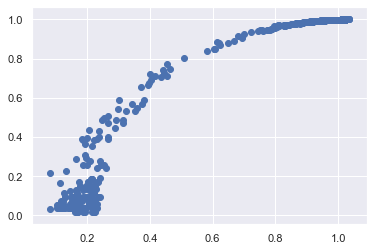

In [32]:
plt.scatter(result, y_test)

In [33]:
from sklearn.model_selection import cross_val_score

mae_cv = cross_val_score(lin_reg, 
                processed_data.drop(target, axis=1), 
                 processed_data[target],
                scoring='neg_mean_absolute_error', 
                cv=5
)
mae_cv

array([-0.021567  , -0.02161904, -0.02173067, -0.02202162, -0.02157454])

In [34]:
mae_cv.mean()

-0.021702573294693973

In [35]:
lin_reg.score(X_train,y_train)

0.9401048196858576

In [36]:
def linear_func(x_train,y_train,x_test,y_test,model):
    model.fit(x_train, y_train)
    result = model.predict(x_test)
    dataFrame = pd.DataFrame(result,columns=['Time from Pickup to Arrival'])
    dataFrame = dataFrame.set_index(x_test.index)
    dataFrame['Order_No'] = dataFrame.index
    dataFrame = dataFrame[['Order_No','Time from Pickup to Arrival' ]]
    dataFrame = dataFrame.reset_index(drop=True)
    return dataFrame


In [37]:
linear_func(X_train, y_train, X_test, y_test, LinearRegression())

,Order_No,Time from Pickup to Arrival
0,1691,0.994190
1,8701,1.022659
2,9142,1.032024
3,15111,1.022575
4,2461,1.008026
...,...,...
4236,17844,0.989212
4237,4827,0.225014
4238,15802,0.800560
4239,19790,1.011539


## HyperParameter Optimization

Tary it with no intercept to see whether anything changes

In [38]:
lin_reg_no_fit = LinearRegression(fit_intercept=False)

In [39]:
mae_cv = cross_val_score(lin_reg_no_fit, 
                processed_data.drop(target, axis=1), 
                processed_data[target],
                scoring='neg_mean_absolute_error', 
                cv=5
)
mae_cv

array([-0.02156974, -0.02162278, -0.02173012, -0.02202325, -0.02157459])

In [40]:
mae_cv.mean()

-0.021704095585622987

In [41]:
from sklearn.linear_model import Ridge

ridgeRegression = Ridge() #instantiate ridge regression

In [42]:
cross_val_score(ridgeRegression, 
                processed_data.drop(target,axis=1), 
                 processed_data[target], 
                cv=5
)

array([0.93840221, 0.94095733, 0.94047515, 0.93504078, 0.936978  ])

In [43]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [44]:
search_parameters_space = {
    "alpha": [0.01, 0.1, 1, 10],  
    "fit_intercept": [True, False], # fit intercept T or F
}

In [45]:
grid = GridSearchCV(estimator=ridgeRegression, 
                    param_grid=search_parameters_space,
                    scoring="r2",
                    n_jobs=-1)

In [46]:
grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 1, 10],
                         'fit_intercept': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [47]:
print(grid.best_score_)

0.9381732038438717


In [48]:
grid.best_params_

{'alpha': 0.01, 'fit_intercept': False}

## Submission 

## Process Train Data

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
from sklearn.preprocessing import StandardScaler

train_data = pd.read_csv('data/Train.csv')
test_data = pd.read_csv('data/Test.csv')



numerical_columns = ['Distance (KM)','Pickup Lat',
       'Pickup Long', 'Destination Lat', 'Destination Long',]
categorical_columns = ['Personal or Business', 'Arrival at Pickup - Weekday (Mo = 1)','Pickup - Day of Month',]

# Convert to Object
train_data[categorical_columns] = train_data[categorical_columns].astype('object')


#Process numerical
scaler = StandardScaler()
scaler.fit(train_data[numerical_columns])
scaled_data = scaler.transform(train_data[numerical_columns])
scaled_data = pd.DataFrame(
    scaled_data,
    columns = train_data[numerical_columns].columns
)


# normalize_data = normalize(train_data[numerical_columns])
# normalized_data = pd.DataFrame(normalize_data,columns=numerical_columns)

#process categorical
encoded_cat = pd.get_dummies(train_data[categorical_columns])
encoded_cat.head()

processed_data = pd.concat([
    scaled_data,
    encoded_cat,
    train_data[target]
], axis=1
)

processed_data.head()

,Distance (KM),Pickup Lat,Pickup Long,Destination Lat,Destination Long,Personal or Business_Business,Personal or Business_Personal,Arrival at Pickup - Weekday (Mo = 1)_1,Arrival at Pickup - Weekday (Mo = 1)_2,Arrival at Pickup - Weekday (Mo = 1)_3,...,Pickup - Day of Month_23,Pickup - Day of Month_24,Pickup - Day of Month_25,Pickup - Day of Month_26,Pickup - Day of Month_27,Pickup - Day of Month_28,Pickup - Day of Month_29,Pickup - Day of Month_30,Pickup - Day of Month_31,Time from Pickup to Arrival
0,-0.971370,-1.189424,0.509897,-0.511888,0.414159,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,745
1,1.145469,-2.294056,2.349813,-0.356757,0.070177,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1993
2,-1.147774,-0.878981,0.858136,-0.526672,0.379588,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,455
3,-0.089354,0.005523,0.563962,0.730374,-0.361289,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1341
4,-0.089354,0.487515,-0.510932,-0.357811,-0.031369,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1214


In [51]:
# scaler_y = StandardScaler()
# scaler_y.fit(processed_data[target])

#used to transform our output data from it's normalized form

In [52]:
target = ['Time from Pickup to Arrival']

train_X = processed_data.drop(target, axis=1)
train_y = processed_data['Time from Pickup to Arrival']

In [53]:
train_X.head()

,Distance (KM),Pickup Lat,Pickup Long,Destination Lat,Destination Long,Personal or Business_Business,Personal or Business_Personal,Arrival at Pickup - Weekday (Mo = 1)_1,Arrival at Pickup - Weekday (Mo = 1)_2,Arrival at Pickup - Weekday (Mo = 1)_3,...,Pickup - Day of Month_22,Pickup - Day of Month_23,Pickup - Day of Month_24,Pickup - Day of Month_25,Pickup - Day of Month_26,Pickup - Day of Month_27,Pickup - Day of Month_28,Pickup - Day of Month_29,Pickup - Day of Month_30,Pickup - Day of Month_31
0,-0.971370,-1.189424,0.509897,-0.511888,0.414159,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.145469,-2.294056,2.349813,-0.356757,0.070177,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-1.147774,-0.878981,0.858136,-0.526672,0.379588,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,-0.089354,0.005523,0.563962,0.730374,-0.361289,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.089354,0.487515,-0.510932,-0.357811,-0.031369,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
train_y

0         745
1        1993
2         455
3        1341
4        1214
         ... 
21196       9
21197     770
21198    2953
21199    1380
21200    2128
Name: Time from Pickup to Arrival, Length: 21201, dtype: int64

## Process Test Data

In [55]:
test_data[categorical_columns] = test_data[categorical_columns].astype('object')


numerical_columns_test = ['Distance (KM)','Pickup Lat',
       'Pickup Long', 'Destination Lat', 'Destination Long']

#Process numerical
scaled_data_test = scaler.transform(test_data[numerical_columns])
scaled_data_test = pd.DataFrame(
    scaled_data_test,
    columns = test_data[numerical_columns_test].columns
)

# normalize_data_test = normalize(test_data[numerical_columns])
# normalized_data_test = pd.DataFrame(normalize_data_test,columns=numerical_columns)

#process categorical
encoded_cat_test = pd.get_dummies(test_data[categorical_columns])
encoded_cat_test.head()

processed_test = pd.concat([
    scaled_data_test,
    encoded_cat_test
], axis=1
)

In [56]:
processed_test.head()

,Distance (KM),Pickup Lat,Pickup Long,Destination Lat,Destination Long,Personal or Business_Business,Personal or Business_Personal,Arrival at Pickup - Weekday (Mo = 1)_1,Arrival at Pickup - Weekday (Mo = 1)_2,Arrival at Pickup - Weekday (Mo = 1)_3,...,Pickup - Day of Month_22,Pickup - Day of Month_23,Pickup - Day of Month_24,Pickup - Day of Month_25,Pickup - Day of Month_26,Pickup - Day of Month_27,Pickup - Day of Month_28,Pickup - Day of Month_29,Pickup - Day of Month_30,Pickup - Day of Month_31
0,-0.265757,-1.698177,1.589230,-0.650961,0.249777,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,-0.794967,0.289471,-0.441416,0.160075,0.283697,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.794967,-0.308929,0.312434,0.172509,0.897696,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,-0.794967,-0.296122,-0.043163,-0.597344,-0.459798,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.618564,0.012751,0.084312,0.462742,-0.426185,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
test_X = processed_test

In [58]:
test_X.head(1)

,Distance (KM),Pickup Lat,Pickup Long,Destination Lat,Destination Long,Personal or Business_Business,Personal or Business_Personal,Arrival at Pickup - Weekday (Mo = 1)_1,Arrival at Pickup - Weekday (Mo = 1)_2,Arrival at Pickup - Weekday (Mo = 1)_3,...,Pickup - Day of Month_22,Pickup - Day of Month_23,Pickup - Day of Month_24,Pickup - Day of Month_25,Pickup - Day of Month_26,Pickup - Day of Month_27,Pickup - Day of Month_28,Pickup - Day of Month_29,Pickup - Day of Month_30,Pickup - Day of Month_31
0,-0.265757,-1.698177,1.58923,-0.650961,0.249777,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [59]:
best_ridge_model = Ridge(alpha=0.01, fit_intercept=False)
best_ridge_model.fit(train_X,train_y)
result = best_ridge_model.predict(test_X)
dataFrame = pd.DataFrame(result,columns=['Time from Pickup to Arrival'])
dataFrame = dataFrame.set_index(test_X.index)
dataFrame['Order_No'] = test_data['Order No']
dataFrame = dataFrame[['Order_No','Time from Pickup to Arrival' ]]

In [60]:
dataFrame.head()

,Order_No,Time from Pickup to Arrival
0,Order_No_19248,1239.722179
1,Order_No_12736,1087.389043
2,Order_No_768,988.005996
3,Order_No_15332,960.095349
4,Order_No_21373,1181.035893


In [61]:
# submission = dataFrame

In [62]:
# submission.to_csv('data/submission/seventh_submission.csv', index=False)

In [63]:
from sklearn.ensemble import BaggingRegressor

In [64]:
estimator_bagging_10 = BaggingRegressor(n_estimators=10)

In [65]:
from sklearn.model_selection import cross_validate

def evaluate_model(estimator):
    cv_results = cross_validate(estimator,
                    X=train_X,
                    y=train_y,
                    scoring="neg_mean_absolute_error",
                          n_jobs=-1, cv=3,
                     return_train_score=True)
    return pd.DataFrame(cv_results).abs().mean().to_dict()

In [66]:
estimator_bagging_10.fit(train_X,train_y)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False)

In [67]:
result = estimator_bagging_10.predict(test_X)

In [68]:
dataFrame = pd.DataFrame(result,columns=['Time from Pickup to Arrival'])
dataFrame = dataFrame.set_index(test_X.index)
dataFrame['Order_No'] = test_data['Order No']
dataFrame = dataFrame[['Order_No','Time from Pickup to Arrival' ]]

In [69]:
dataFrame

,Order_No,Time from Pickup to Arrival
0,Order_No_19248,1339.100000
1,Order_No_12736,1400.800000
2,Order_No_768,969.600000
3,Order_No_15332,1023.300000
4,Order_No_21373,818.800000
...,...,...
7063,Order_No_3612,1698.066667
7064,Order_No_7657,2939.600000
7065,Order_No_1969,1432.800000
7066,Order_No_10591,2195.900000


In [70]:
best_ridge_model = Ridge(alpha=0.01, fit_intercept=False)
best_ridge_model.fit(train_X,train_y)
result = best_ridge_model.predict(test_X)
dataFrame = pd.DataFrame(result,columns=['Time from Pickup to Arrival'])
dataFrame = dataFrame.set_index(test_X.index)
dataFrame['Order_No'] = test_data['Order No']
dataFrame = dataFrame[['Order_No','Time from Pickup to Arrival' ]]

In [71]:
def estimator_result(estimator):
    estimator.fit(train_X,train_y)
    result = estimator.predict(test_X)
    dataFrame = pd.DataFrame(result,columns=['Time from Pickup to Arrival'])
    dataFrame = dataFrame.set_index(test_X.index)
    dataFrame['Order_No'] = test_data['Order No']
    dataFrame = dataFrame[['Order_No','Time from Pickup to Arrival' ]]
    return dataFrame